In [37]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import gaia_roman_combined as grc

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib
#matplotlib.rc('text',usetex=True)
font = {'family' : 'serif',
#        'weight' : 'bold',
        'size'   : 16,}
matplotlib.rc('font', **font)


In [39]:
#define some default values

roman_pos_err_floor = 0.01*grc.roman_pix_scale #mas, floor or pos uncertainty, (standard is 1% pixel)
gaia_era = 'DR4' #choose from ['DR3','DR4','DR5']

In [40]:
print('Allowed Roman filters are:',grc.allowed_filters)
print(f'Currently Using a Roman position uncertainty floor of {roman_pos_err_floor} mas')

Allowed Roman filters are: ['F062', 'F087', 'F106', 'F129', 'F146', 'F158', 'F184', 'F213']
Currently Using a Roman position uncertainty floor of 1.078577405 mas


In [41]:
'''
Example of how to measure the improved astrometry from combining Roman and Gaia.
The user must provide lists of Roman magnitudes (and corresponding filters),
Gaia magnitudes, and Roman observation plans (MJD, Roman filter, n_repeat_at_epoch).
'''

#example with 100 magnitudes
n_stars = 100
roman_filters = ['F106','F213'] #list of filters that we will have Roman observations for
n_filters = len(roman_filters)

#array that contains the Roman magnitudes in each filter.
#
roman_mags = np.zeros((n_stars,n_filters)) 
roman_mags[:,0] = np.linspace(17.3,26,n_stars)         #AB mags
roman_mags[:,1] = np.linspace(17.3,26,n_stars) + 0.1   #AB mags
#Gaia magnitudes (of same length as roman_mags).
#Again, this could be improved with isochrones to get
#better agreement between Roman and Gaia mags
gaia_mags = roman_mags[:,0] - 0.5 #Gaia G mags

roman_mags[:,1] = np.linspace(17.3,26,n_stars)
gaia_mags = roman_mags[:,0]

#now set up the observing plan by listing the MJDs of each Roman epoch,
#the Roman filter at that epoch, and the number of repeat Roman 
#observations at that epoch

epoch_MJDs = [61771.5, 62867.25, 63049.875] #J2028.0, J2031.0, J2031.5
epoch_filters = ['F213','F106','F213'] #filter for that observation
n_images_per_epoch = [4,3,4]

epoch_MJDs = [61771.5] #J2028.0, J2031.0, J2031.5
epoch_filters = ['F213'] #filter for that observation
n_images_per_epoch = [100]

epoch_MJDs = [57388.5] #J2028.0, J2031.0, J2031.5
epoch_filters = ['F213'] #filter for that observation
n_images_per_epoch = [100]

# epoch_MJDs = [57388.5, 61771.5] #J2028.0, J2031.0, J2031.5
# epoch_filters = ['F213','F106'] #filter for that observation
# n_images_per_epoch = [100,100]


#build the observation list using the above data
observation_list = list(zip(epoch_MJDs,epoch_filters,n_images_per_epoch))


#Get the new precision from this configuration of
#magnitudes and observing plans. 
#NOTE: specifying ra and dec mean that parallax is used in 
#the calculation. Leaving the ra and dec as None will
#only use positions and PMs in the calculation.
new_precision = grc.gaia_roman_astrometric_precision(
    roman_mags = roman_mags,
    roman_filters = roman_filters,
    gaia_mags = gaia_mags,
    observation_list = observation_list,
    gaia_era = 'DR4',
    ra = 180.0, dec = 0.0,
)

/opt/anaconda3/envs/roman_test/lib/python3.12/site-packages/numpy/linalg/_linalg.py:2430: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


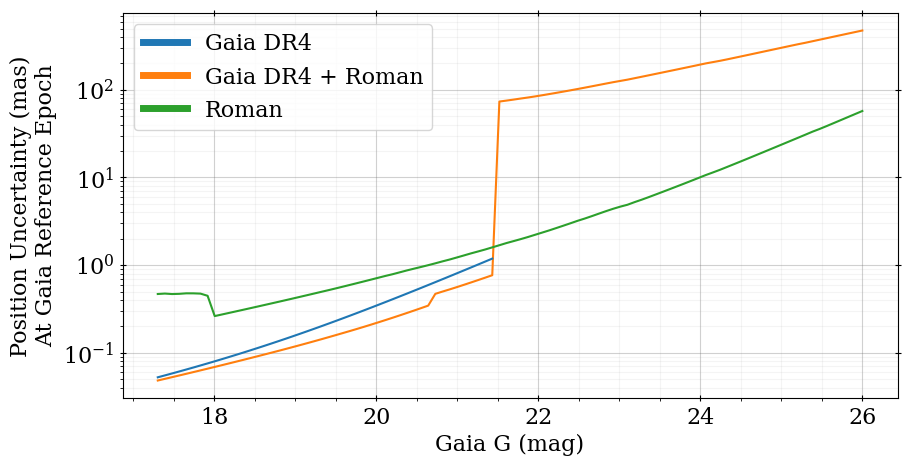

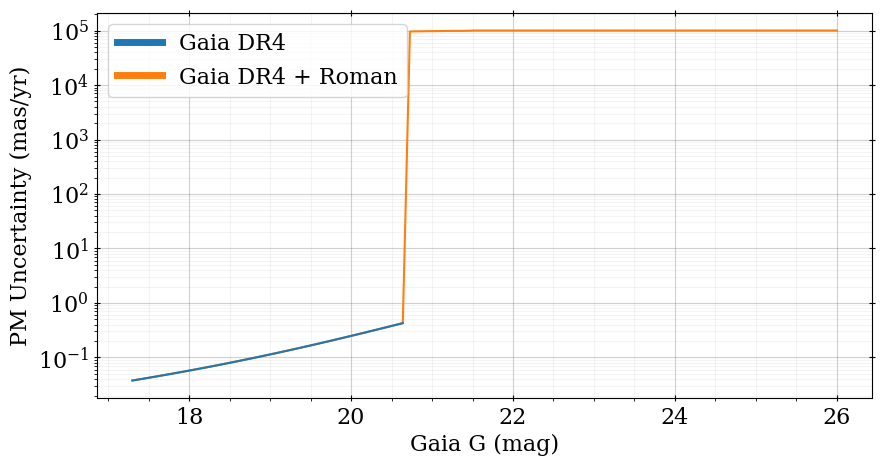

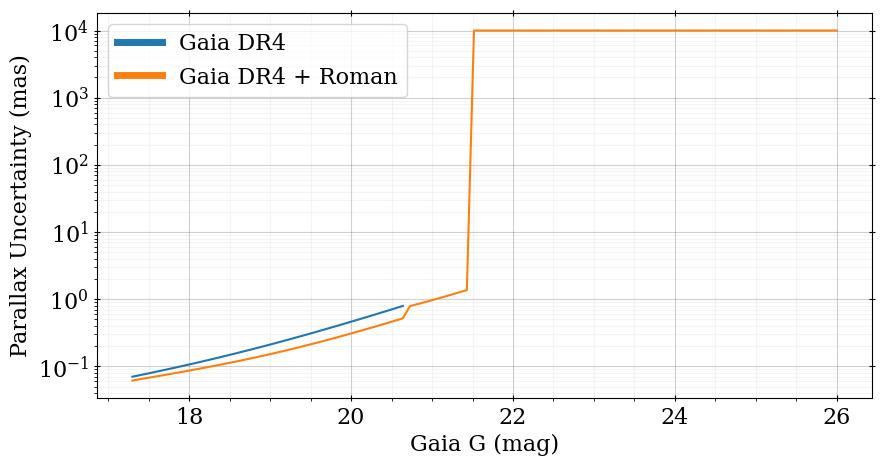

In [42]:
plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_yscale('log')
plt.grid(visible=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.1)
ax.tick_params(axis='both',direction='inout',length=5,bottom=True,left=True,right=True,top=True)
plt.plot(new_precision.gaia_gs,new_precision.gaia_pos_errs,label=f'Gaia {new_precision.gaia_era}',zorder=10)
plt.plot(new_precision.gaia_gs,new_precision.final_pos_errs,label=f'Gaia {new_precision.gaia_era} + Roman')
plt.plot(new_precision.gaia_gs,new_precision.roman_pos_errs[:,0],label=f'Roman',zorder=10)
plt.xlabel('Gaia G (mag)')
plt.ylabel('Position Uncertainty (mas)\nAt Gaia Reference Epoch')
leg = plt.legend(loc='best')
for line in leg.get_lines():
    line.set_linewidth(5.0)
plt.show()

plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_yscale('log')
plt.grid(visible=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.1)
ax.tick_params(axis='both',direction='inout',length=5,bottom=True,left=True,right=True,top=True)
plt.plot(new_precision.gaia_gs,new_precision.gaia_pm_errs,label=f'Gaia {new_precision.gaia_era}',zorder=10)
plt.plot(new_precision.gaia_gs,new_precision.final_pm_errs,label=f'Gaia {new_precision.gaia_era} + Roman')
plt.xlabel('Gaia G (mag)')
plt.ylabel(r'PM Uncertainty (mas/yr)')
leg = plt.legend(loc='best')
for line in leg.get_lines():
    line.set_linewidth(5.0)
plt.show()

plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_yscale('log')
plt.grid(visible=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.1)
ax.tick_params(axis='both',direction='inout',length=5,bottom=True,left=True,right=True,top=True)
plt.plot(new_precision.gaia_gs,new_precision.gaia_parallax_errs,label=f'Gaia {new_precision.gaia_era}',zorder=10)
plt.plot(new_precision.gaia_gs,new_precision.final_parallax_errs,label=f'Gaia {new_precision.gaia_era} + Roman')
plt.xlabel('Gaia G (mag)')
plt.ylabel(r'Parallax Uncertainty (mas)')
leg = plt.legend(loc='best')
for line in leg.get_lines():
    line.set_linewidth(5.0)
plt.show()




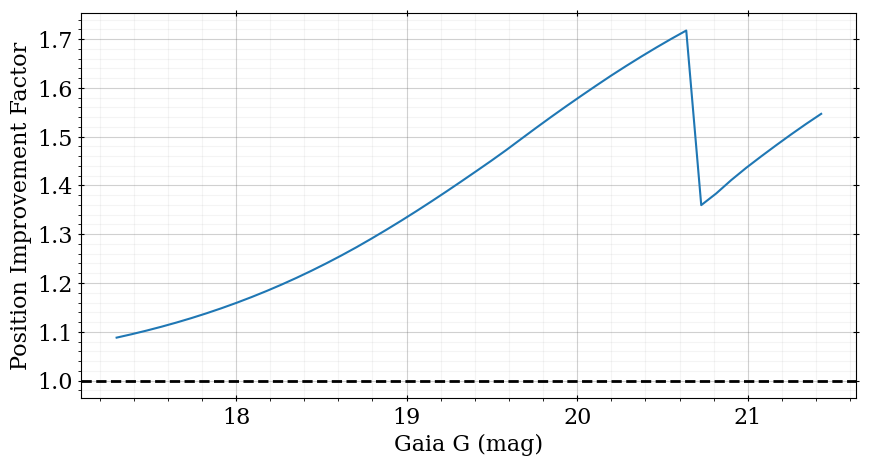

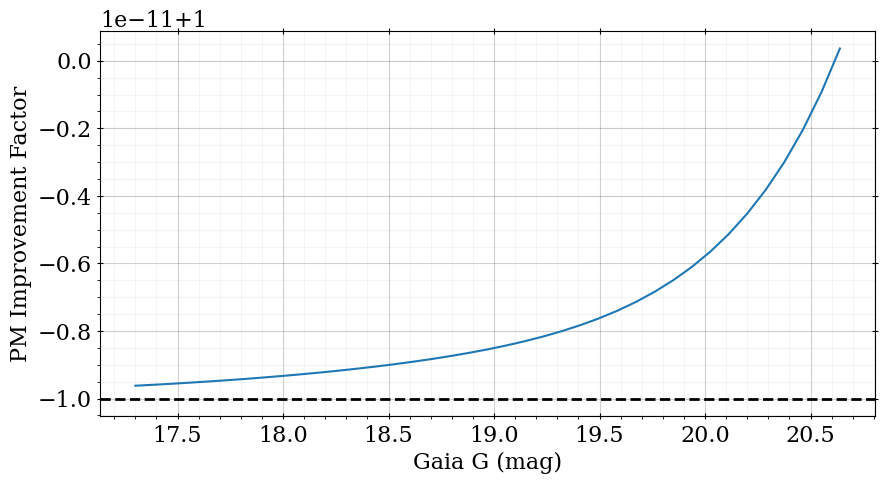

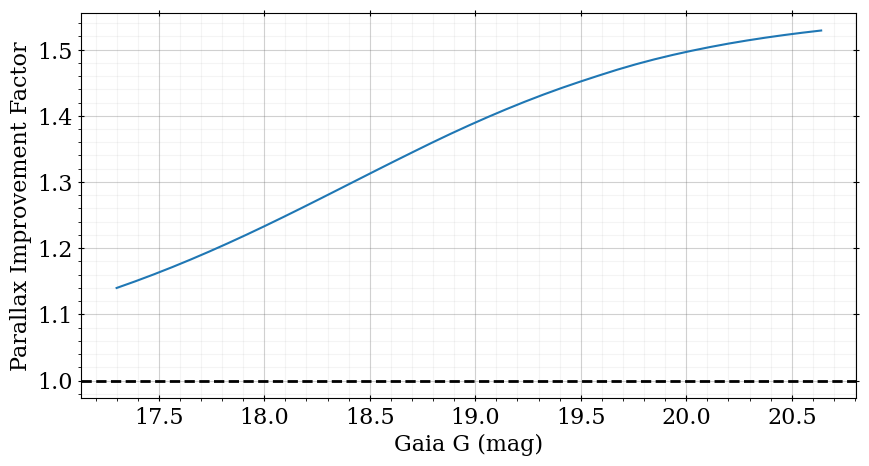

In [43]:
plt.figure(figsize=(10,5))
ax = plt.gca()
plt.axhline(1.0,c='k',lw=2,ls='--')
plt.grid(visible=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.1)
ax.tick_params(axis='both',direction='inout',length=5,bottom=True,left=True,right=True,top=True)
plt.plot(new_precision.gaia_gs,new_precision.gaia_pos_errs/new_precision.final_pos_errs)
plt.xlabel('Gaia G (mag)')
plt.ylabel(r'Position Improvement Factor')
plt.show()

plt.figure(figsize=(10,5))
ax = plt.gca()
plt.axhline(1.0,c='k',lw=2,ls='--')
plt.grid(visible=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.1)
ax.tick_params(axis='both',direction='inout',length=5,bottom=True,left=True,right=True,top=True)
plt.plot(new_precision.gaia_gs,new_precision.gaia_pm_errs/new_precision.final_pm_errs)
plt.xlabel('Gaia G (mag)')
plt.ylabel(r'PM Improvement Factor')
plt.show()

plt.figure(figsize=(10,5))
ax = plt.gca()
plt.axhline(1.0,c='k',lw=2,ls='--')
plt.grid(visible=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.1)
ax.tick_params(axis='both',direction='inout',length=5,bottom=True,left=True,right=True,top=True)
plt.plot(new_precision.gaia_gs,new_precision.gaia_parallax_errs/new_precision.final_parallax_errs)
plt.xlabel('Gaia G (mag)')
plt.ylabel(r'Parallax Improvement Factor')
plt.show()


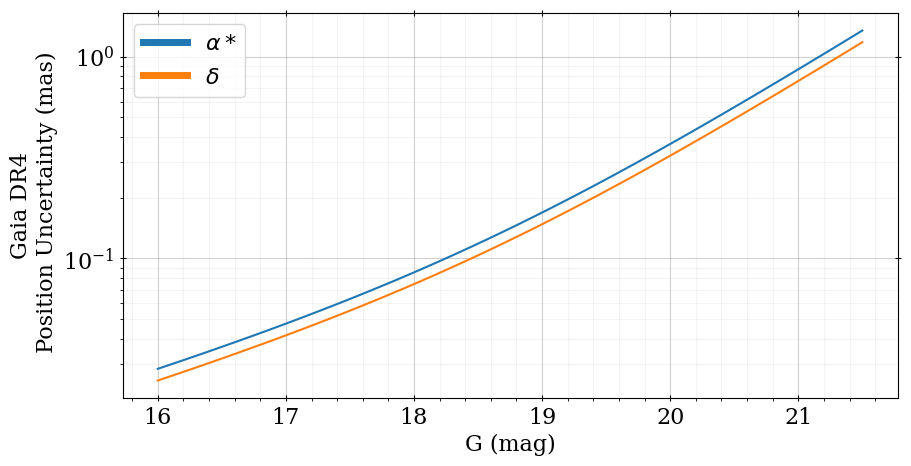

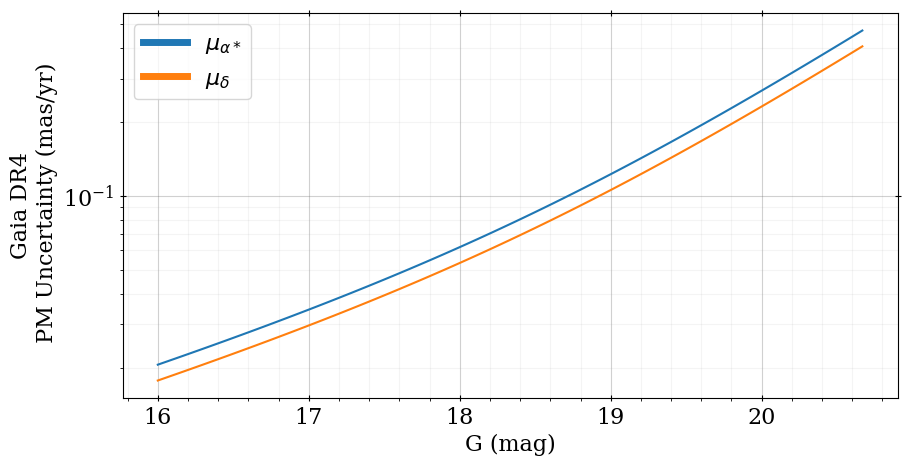

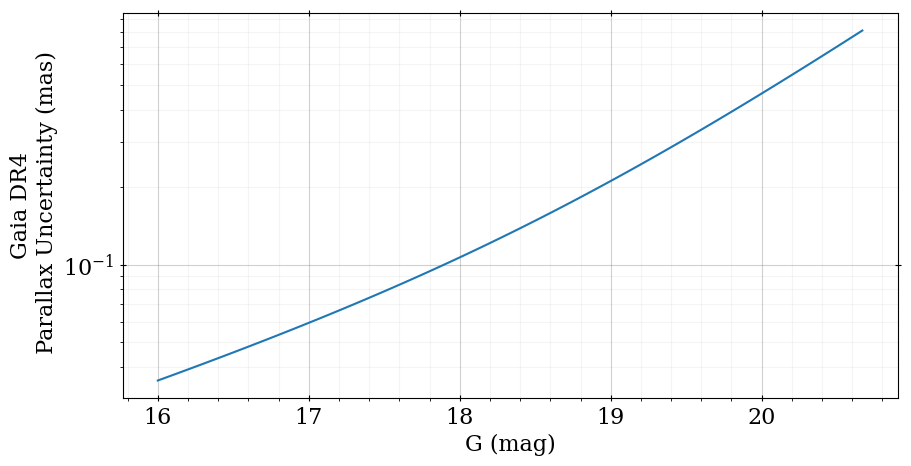

In [19]:
'''
Plot size of Gaia astrometric precision for a chosen gaia data release era
'''

gmags = np.linspace(16,21.5,100)
gaia_precision = grc.gaia_astrometry_precision(gmags,era=gaia_era)

plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_yscale('log')
plt.grid(visible=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.1)
ax.tick_params(axis='both',direction='inout',length=5,bottom=True,left=True,right=True,top=True)
plt.xlabel('G (mag)')
plt.ylabel(f'Gaia {gaia_era}\n Position Uncertainty (mas)')
plt.plot(gmags,gaia_precision[0],label=r'$\alpha*$')
plt.plot(gmags,gaia_precision[1],label=r'$\delta$')
leg = plt.legend(loc='best')
for line in leg.get_lines():
    line.set_linewidth(5.0)
plt.show()

plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_yscale('log')
plt.grid(visible=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.1)
ax.tick_params(axis='both',direction='inout',length=5,bottom=True,left=True,right=True,top=True)
plt.xlabel('G (mag)')
plt.ylabel(f'Gaia {gaia_era}\n PM Uncertainty (mas/yr)')
plt.plot(gmags,gaia_precision[2],label=r'$\mu_{\alpha*}$')
plt.plot(gmags,gaia_precision[3],label=r'$\mu_{\delta}$')
leg = plt.legend(loc='best')
for line in leg.get_lines():
    line.set_linewidth(5.0)
plt.show()

plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_yscale('log')
plt.grid(visible=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.1)
ax.tick_params(axis='both',direction='inout',length=5,bottom=True,left=True,right=True,top=True)
plt.xlabel('G (mag)')
plt.ylabel(f'Gaia {gaia_era}\n Parallax Uncertainty (mas)')
plt.plot(gmags,gaia_precision[4])
plt.show()


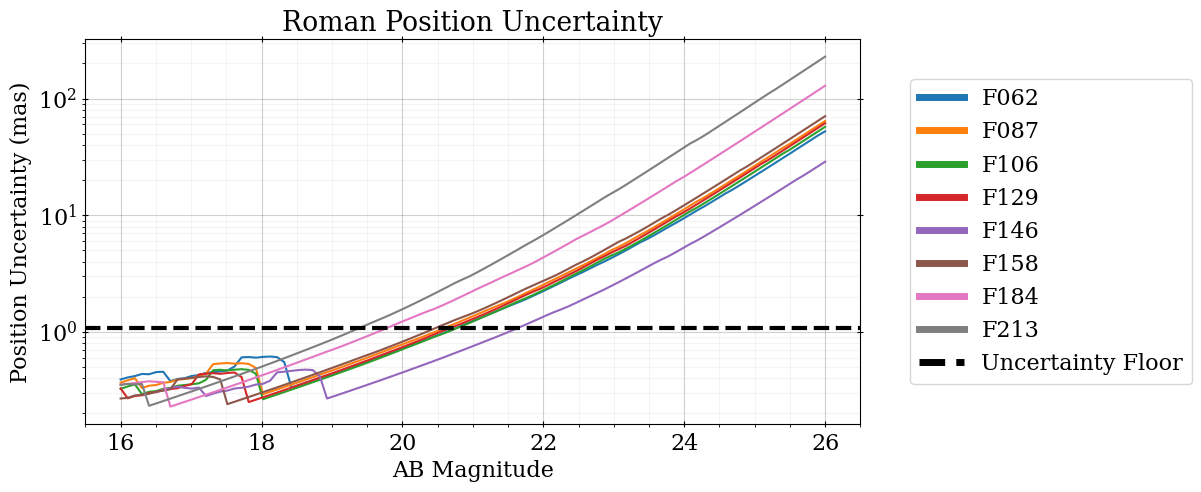

In [16]:
mags_ab = np.linspace(16,26,100)

plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_yscale('log')
plt.grid(visible=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.1)
ax.tick_params(axis='both',direction='inout',length=5,bottom=True,left=True,right=True,top=True)
plt.title(f'Roman Position Uncertainty')
plt.xlabel('AB Magnitude')
plt.ylabel('Position Uncertainty (mas)')
for filt in grc.allowed_filters:
    curr_pos_errs = grc.roman_position_precision(mags_ab,filt)
    plt.plot(mags_ab,curr_pos_errs,label=filt)
plt.axhline(roman_pos_err_floor,c='k',ls='--',lw=3,label = 'Uncertainty Floor')
leg = plt.legend(loc=6,bbox_to_anchor=(1.05,0.5))
for line in leg.get_lines():
    line.set_linewidth(5.0)
plt.show()
